# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the Data

In [ ]:
!pip install kaggle

In [ ]:
!kaggle config set -n path -v C:\Users\_STARS_\OneDrive\Desktop\NTI/kaggle.json

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 36.9MB/s]


In [ ]:
!unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Removing duplicates
We can use .drop_duplicates()

In [ ]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## Quick View for the the data
We can use .describe() and .info()

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df[df['Fare'] ==0].value_counts()

PassengerId  Survived  Pclass  Name                    Sex   Age        SibSp  Parch  Ticket  Fare  Cabin  Embarked
264          0         1       Harrison, Mr. William   male  40.000000  0      0      112059  0.0   B94    S           1
807          0         1       Andrews, Mr. Thomas Jr  male  39.000000  0      0      112050  0.0   A36    S           1
816          0         1       Fry, Mr. Richard        male  29.699118  0      0      112058  0.0   B102   S           1
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Converting data types
Using .astype()

In [ ]:
df[['Sex', 'Embarked']] = df[['Sex', 'Embarked']].astype('string')
df[['Age', 'Fare']] = df[['Age', 'Fare']].astype('int')
df['Survived'] = df['Survived'].astype('bool')
df['Name'] = df['Name'].astype('string')
df['Ticket'] = df['Ticket'].astype('string')
df['Cabin'] = df['Cabin'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    bool  
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    string
 4   Sex          891 non-null    string
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    string
 9   Fare         891 non-null    int64 
 10  Cabin        204 non-null    string
 11  Embarked     891 non-null    string
dtypes: bool(1), int64(6), string(5)
memory usage: 77.6 KB


## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

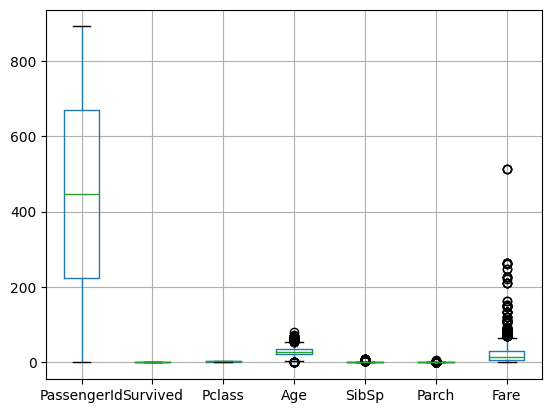

In [ ]:
df.boxplot()
plt.show()

In [ ]:
df[df['Fare'] == df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,True,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512,<NA>,C
679,680,True,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512,B51 B53 B55,C
737,738,True,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512,B101,C


##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype()

In [ ]:
df['Sex'].unique()
sex_wraper = {'male': '0', 'female': '1'}
df['Sex'] = df['Sex'].replace(sex_wraper).astype('int')

In [ ]:
df['Survived'].unique()
survived_wraper = {True: 1, False: 0}
df['Survived'] = df['Survived'].replace(survived_wraper)

In [ ]:
df['Embarked'].unique()
embarked_wraper = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].replace(embarked_wraper)

TypeError: Cannot set non-string value '0' into a StringArray.

## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

# Data Preprocessing


## Renaming columns
Using .rename()

In [ ]:
df.rename(columns={'Pclass': 'Passenger Class', 'Sex': 'Gender'}, inplace = True)

## Changing column order
Using .reindex()


In [ ]:
df.reindex(columns=['Passenger Class', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'])

,Passenger Class,Gender,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22,1,0,7,S,0
1,1,1,38,1,0,71,C,1
2,3,1,26,0,0,7,S,1
3,1,1,35,1,0,53,S,1
4,3,0,35,0,0,8,S,0
...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13,S,0
887,1,1,19,0,0,30,S,1
888,3,1,29,1,2,23,S,0
889,1,0,26,0,0,30,C,1


## Dropping unnecessary columns
 Use .drop() in pandas.

In [ ]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis =1)

,Survived,Passenger Class,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,S
1,1,1,1,38,1,0,71,C
2,1,3,1,26,0,0,7,S
3,1,1,1,35,1,0,53,S
4,0,3,0,35,0,0,8,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,S
887,1,1,1,19,0,0,30,S
888,0,3,1,29,1,2,23,S
889,1,1,0,26,0,0,30,C


## Encoding categorical variables


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

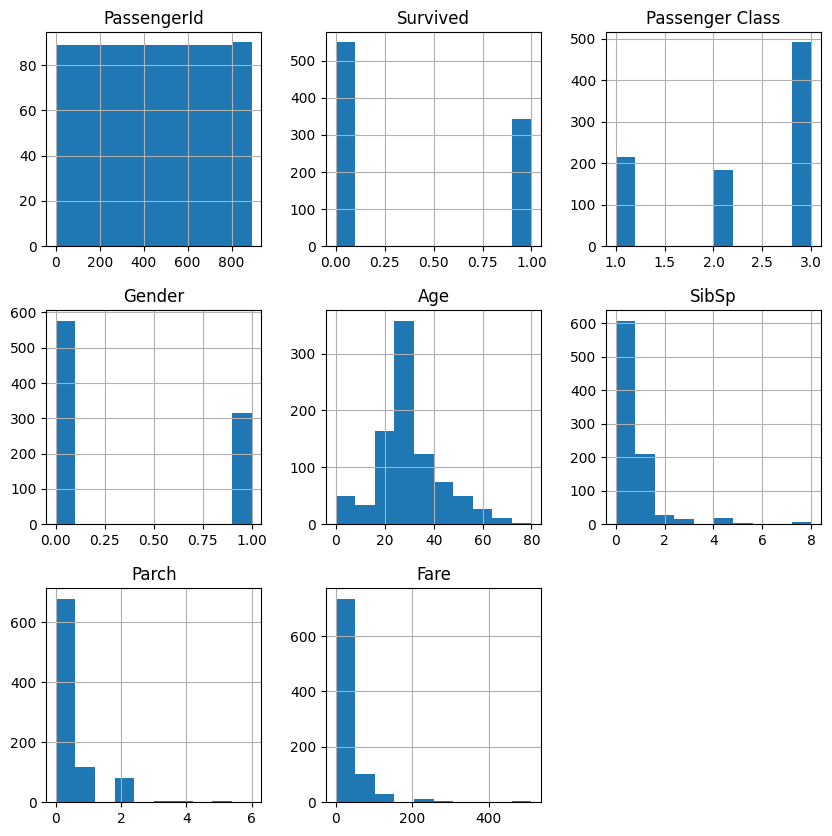

In [ ]:
df.hist(figsize = (10, 10))
plt.show()

## Box plots
Use .boxplot() in pandas to visualize the distribution through quartiles, extremes, and outliers for a numeric variable.

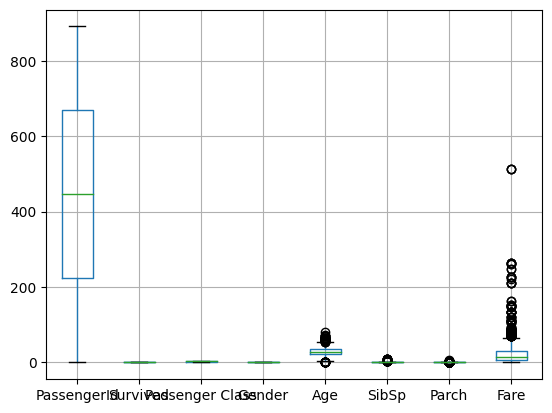

In [ ]:
df.boxplot()
plt.show()

## Scatter plots
Use .plot(kind=’scatter’) to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

Index(['PassengerId', 'Survived', 'Passenger Class', 'Name', 'Gender', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


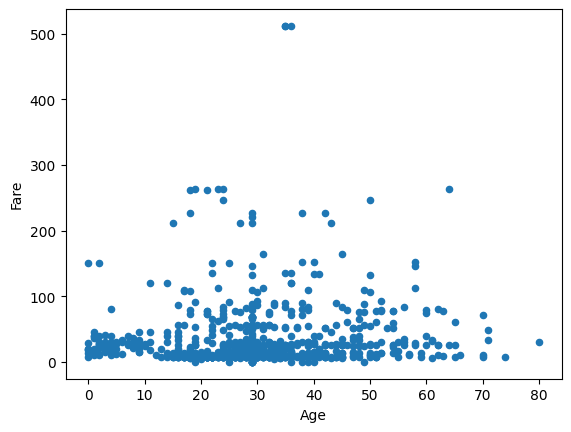

In [ ]:
print(df.columns)

df.plot(kind='scatter', x='Age', y='Fare')
plt.show()

## Bar plots
Use .plot(kind=’bar’) to compare categorical variables or the counts of categorical variables. This gives a quick visual summary.

<Axes: xlabel='Embarked'>

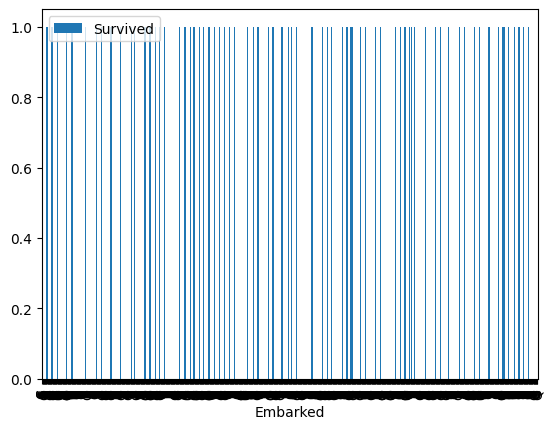

In [ ]:
df.plot(kind = 'bar', x = 'Embarked', y = 'Survived')

## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

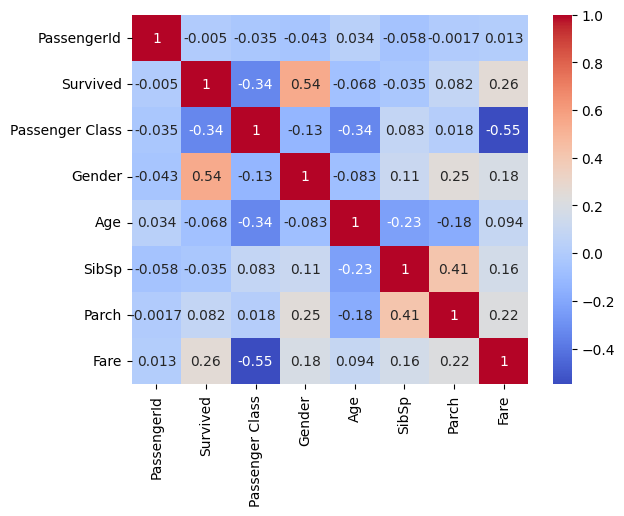

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64', 'boolean'])
x = df_numeric.corr()

import seaborn as sns
sns.heatmap(x, annot=True, cmap='coolwarm')
plt.show()